# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Capitalize city name properly
    city_name = city.title()

    # Create endpoint URL with each city
    city_url = f"{url}?appid={weather_api_key}&units={units}&q={city_name}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city_name))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Bilibino
Processing Record 2 of Set 1 | Kurduvadi
Processing Record 3 of Set 1 | Portland
Processing Record 4 of Set 1 | Blackmans Bay
Processing Record 5 of Set 1 | Mwaro
Processing Record 6 of Set 1 | Georgetown
Processing Record 7 of Set 1 | Pemangkat
Processing Record 8 of Set 1 | Pagar Alam
Processing Record 9 of Set 1 | Nadym
Processing Record 10 of Set 1 | Samora Correia
Processing Record 11 of Set 1 | Isafjordur
Processing Record 12 of Set 1 | Waitangi
Processing Record 13 of Set 1 | Broken Hill
Processing Record 14 of Set 1 | Lompoc
Processing Record 15 of Set 1 | Argo
Processing Record 16 of Set 1 | Mangrol
Processing Record 17 of Set 1 | Edinburgh Of The Seven Seas
Processing Record 18 of Set 1 | Borogontsy
Processing Record 19 of Set 1 | Carnarvon
Processing Record 20 of Set 1 | Iskateley
Processing Record 21 of Set 1 | Hamilton
Processing Record 22 of Set 1 | Cidreira
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,-9.53,82,99,2.02,RU,1743560437
1,kurduvadi,18.0833,75.4333,28.69,39,63,6.13,IN,1743560438
2,portland,45.5234,-122.6762,11.56,79,100,1.54,US,1743560015
3,blackmans bay,-43.0167,147.3167,17.07,58,13,0.45,AU,1743560441
4,mwaro,-3.5000,29.6667,12.95,92,100,0.64,BI,1743560442


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,-9.53,82,99,2.02,RU,1743560437
1,kurduvadi,18.0833,75.4333,28.69,39,63,6.13,IN,1743560438
2,portland,45.5234,-122.6762,11.56,79,100,1.54,US,1743560015
3,blackmans bay,-43.0167,147.3167,17.07,58,13,0.45,AU,1743560441
4,mwaro,-3.5000,29.6667,12.95,92,100,0.64,BI,1743560442


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

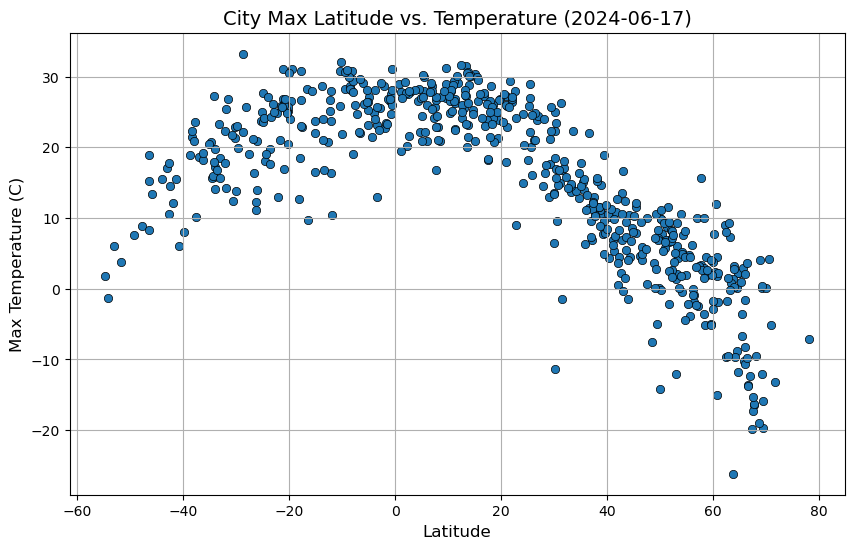

In [9]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], 
            edgecolors="black", linewidths=0.5)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-06-17)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (C)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

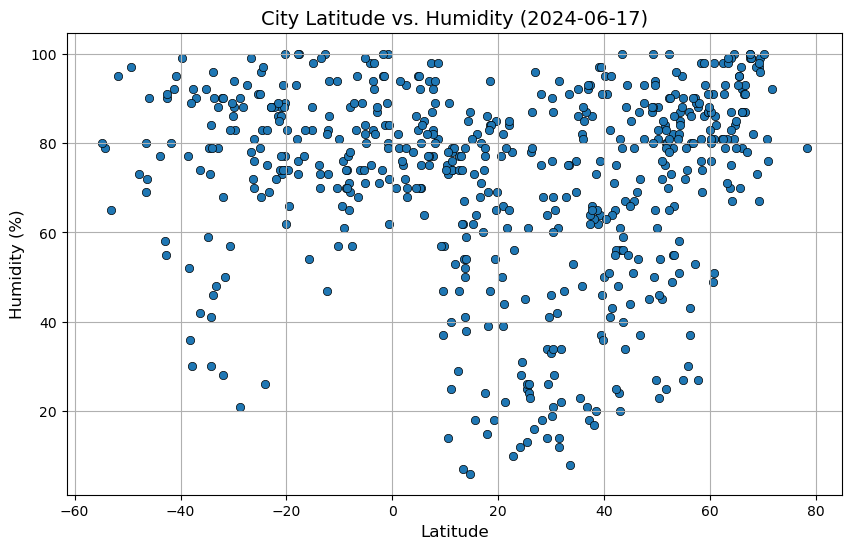

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], 
            edgecolors="black", linewidths=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-17)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

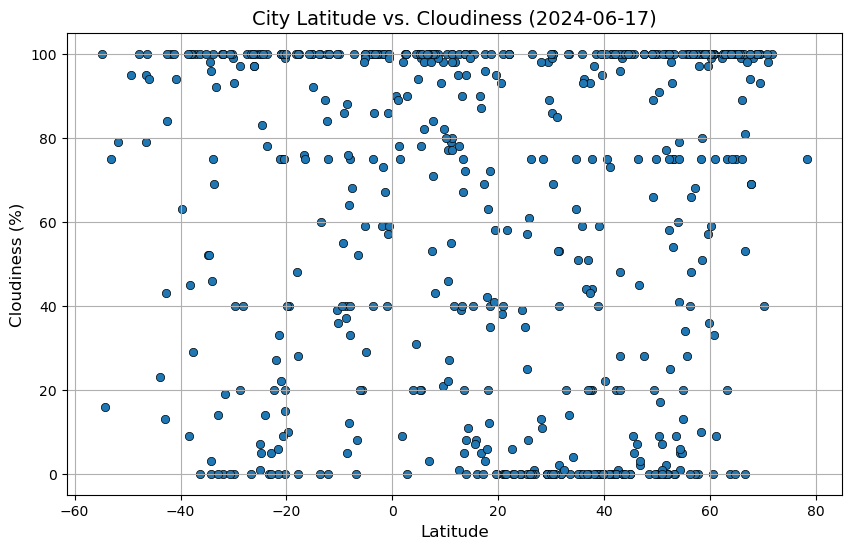

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], 
            edgecolors="black", linewidths=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

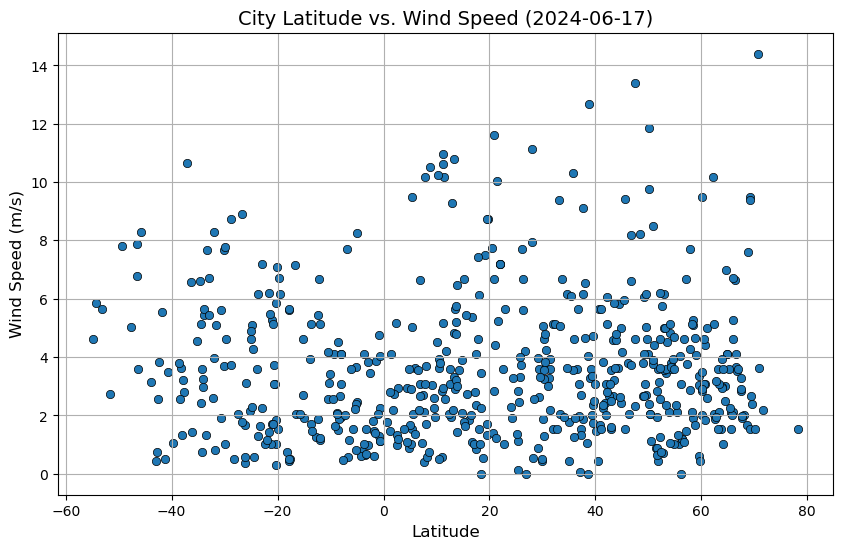

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], 
            edgecolors="black", linewidths=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (m/s)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, xlabel, ylabel, title, filename):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    regress_values = slope * x + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Print R-squared value
    print(f"The r²-value is: {rvalue**2}")

    # Plot
    plt.figure(figsize=(10,6))
    plt.scatter(x, y, edgecolors="black", linewidths=0.5)
    plt.plot(x, regress_values, "r", label=line_eq)
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True)

    # Add regression line equation as text
    plt.text(x.min() + 2, y.min() + 2, line_eq, color="red", fontsize=12)

    # Save and show
    plt.savefig(filename)
    plt.show()

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,-9.53,82,99,2.02,RU,1743560437
1,kurduvadi,18.0833,75.4333,28.69,39,63,6.13,IN,1743560438
2,portland,45.5234,-122.6762,11.56,79,100,1.54,US,1743560015
5,georgetown,5.4112,100.3354,29.97,70,20,1.54,MY,1743560115
6,pemangkat,1.1667,108.9667,27.78,79,78,1.46,ID,1743560232


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,blackmans bay,-43.0167,147.3167,17.07,58,13,0.45,AU,1743560441
4,mwaro,-3.5000,29.6667,12.95,92,100,0.64,BI,1743560442
7,pagar alam,-4.0167,103.2667,24.87,75,100,0.78,ID,1743560445
11,waitangi,-43.9535,-176.5597,15.46,77,23,3.13,NZ,1743560450
12,broken hill,-31.9500,141.4333,25.35,28,0,3.97,AU,1743560451


###  Temperature vs. Latitude Linear Regression Plot

The r²-value is: 0.7977486054314586


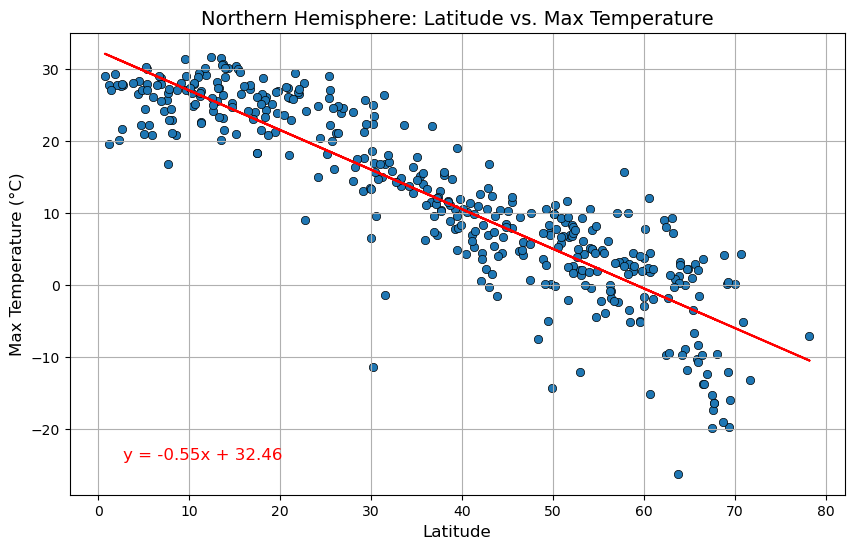

In [21]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    x=northern_hemi_df["Lat"],
    y=northern_hemi_df["Max Temp"],
    xlabel="Latitude",
    ylabel="Max Temperature (°C)",
    title="Northern Hemisphere: Latitude vs. Max Temperature",
    filename="output_data/NH_Lat_vs_MaxTemp.png"
)

The r²-value is: 0.44639540634666336


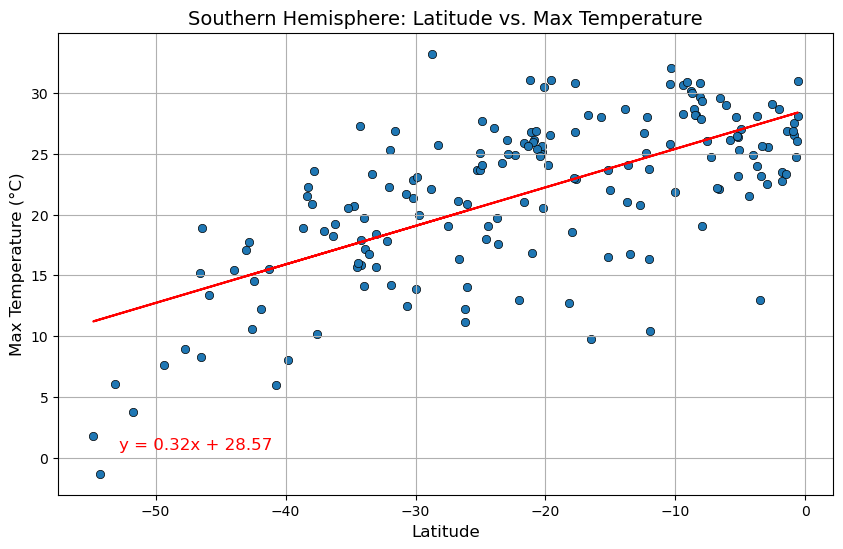

In [22]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    x=southern_hemi_df["Lat"],
    y=southern_hemi_df["Max Temp"],
    xlabel="Latitude",
    ylabel="Max Temperature (°C)",
    title="Southern Hemisphere: Latitude vs. Max Temperature",
    filename="output_data/SH_Lat_vs_MaxTemp.png"
)

**Discussion about the linear relationship:**
The Northern Hemisphere shows a negative slope. This indicates that as latitude increases the max temp will decrease. This could relate to the distance from the equator and exposure to the sun because of positioning.
The Southern Hemisphere shows a positive slope. This indicates as latitude increases the max temp will increase. Like the previous graph this could be due to positioning to the equator and exposure to the sun.

### Humidity vs. Latitude Linear Regression Plot

The r²-value is: 0.060006029865188736


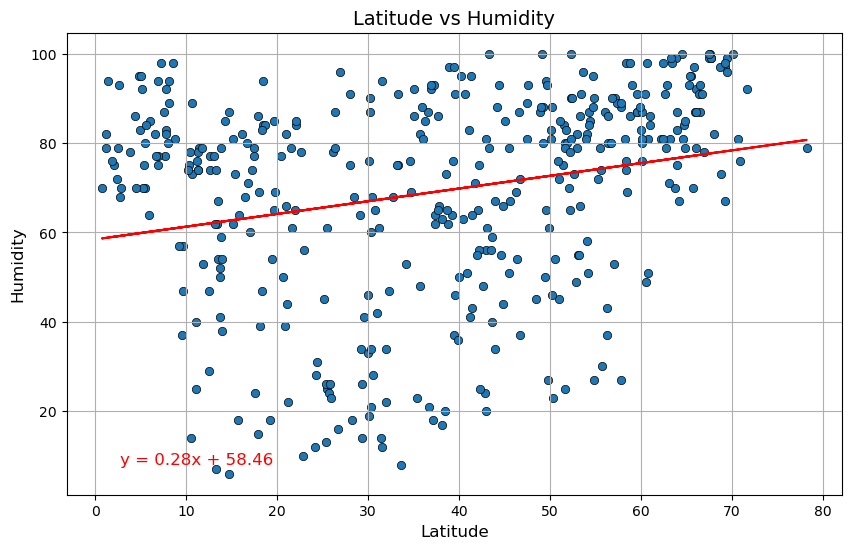

In [23]:
# Northern Hemisphere
plot_linear_regression(
    x=northern_hemi_df["Lat"],
    y=northern_hemi_df["Humidity"],
    xlabel="Latitude",
    ylabel="Humidity",
    title="Latitude vs Humidity",
    filename="output_data/NH_Lat_vs_Humidity.png"
)

The r²-value is: 0.022033532777565035


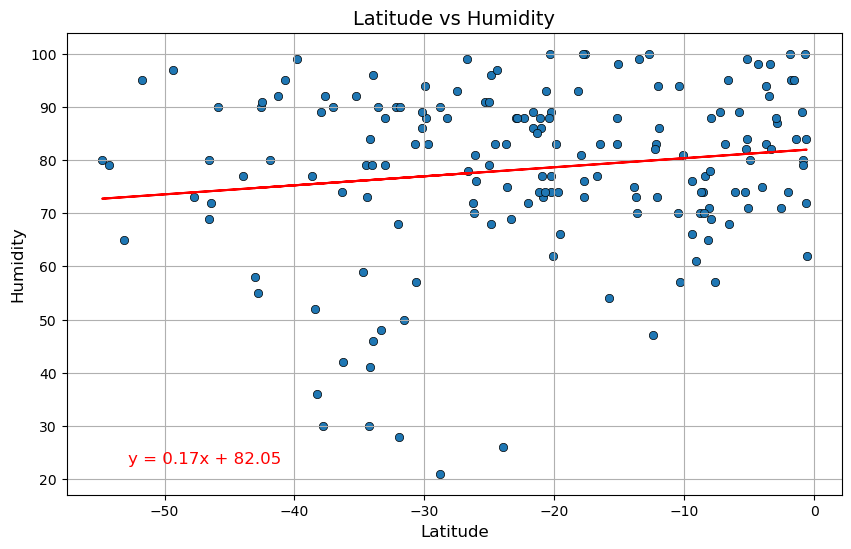

In [24]:
# Southern Hemisphere
plot_linear_regression(
    x=southern_hemi_df["Lat"],
    y=southern_hemi_df["Humidity"],
    xlabel="Latitude",
    ylabel="Humidity",
    title="Latitude vs Humidity",
    filename="output_data/SH_Lat_vs_Humidity.png"
)

**Discussion about the linear relationship:**
For the Northern Hemipshere, there is a positive slope which means that humidity increases as latitude increases.
For the Southern Hemisphere, there is a positive slope which means that humidity slightly increases as latitude approaches 0. The correlation appears to be weak and this relationship is less than that shown in the Northern Hemipshere, can also be observed by the line having a lesser slope.

### Cloudiness vs. Latitude Linear Regression Plot

The r²-value is: 0.006459264919468813


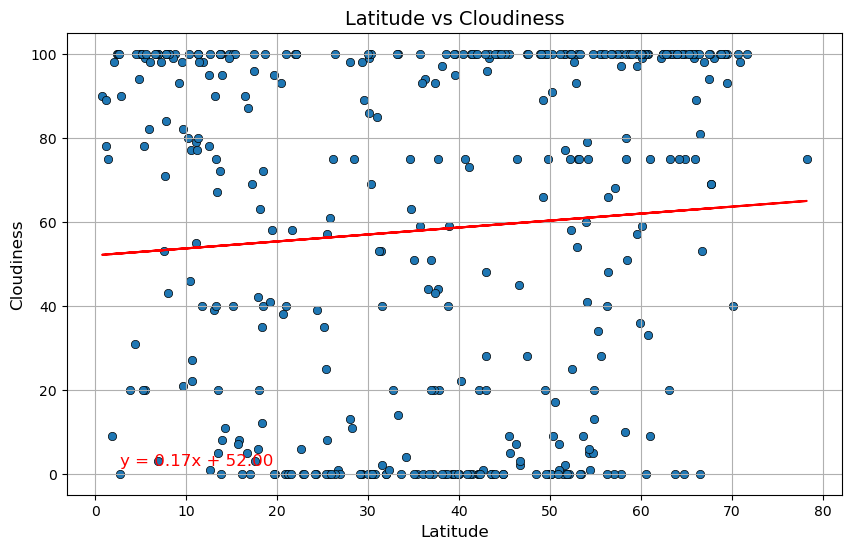

In [25]:
# Northern Hemisphere
plot_linear_regression(
    x=northern_hemi_df["Lat"],
    y=northern_hemi_df["Cloudiness"],
    xlabel="Latitude",
    ylabel="Cloudiness",
    title="Latitude vs Cloudiness",
    filename="output_data/NH_Lat_vs_Cloudiness.png"
)

The r²-value is: 0.000522726587677929


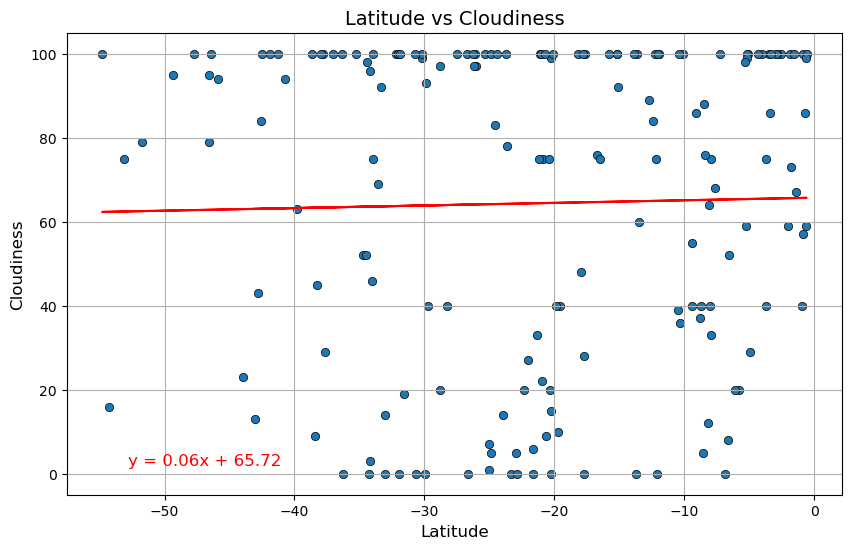

In [26]:
# Southern Hemisphere
plot_linear_regression(
    x=southern_hemi_df["Lat"],
    y=southern_hemi_df["Cloudiness"],
    xlabel="Latitude",
    ylabel="Cloudiness",
    title="Latitude vs Cloudiness",
    filename="output_data/SH_Lat_vs_Cloudiness.png"
)

**Discussion about the linear relationship:**
Both hemispheres show a slightly positive trend, however, the northern hemisphere has a more positive slope than the southern hemisphere. However, the relationship in both is very weak. Latitude may not have much of a significant impact on cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r²-value is: 3.5168420092920673e-06


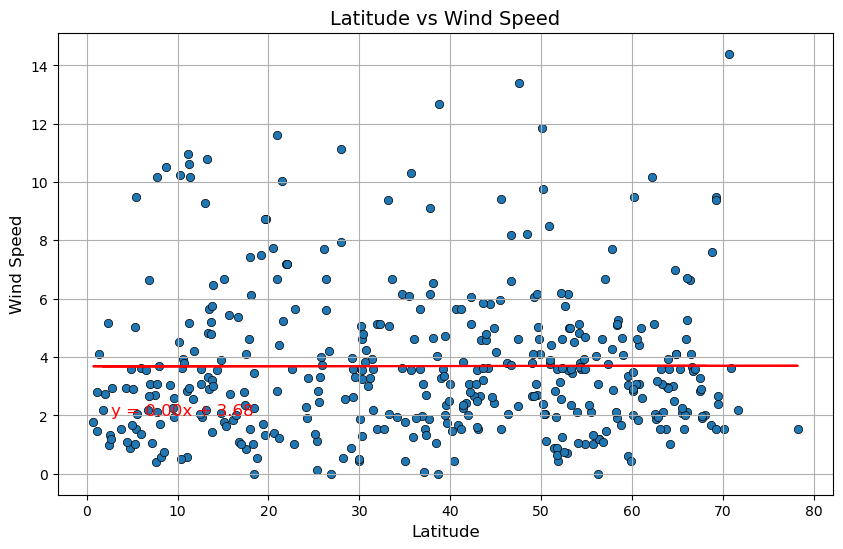

In [27]:
# Northern Hemisphere
plot_linear_regression(
    x=northern_hemi_df["Lat"],
    y=northern_hemi_df["Wind Speed"],
    xlabel="Latitude",
    ylabel="Wind Speed",
    title="Latitude vs Wind Speed",
    filename="output_data/NH_Lat_vs_WindSpeed.png"
)

The r²-value is: 0.09575566013187008


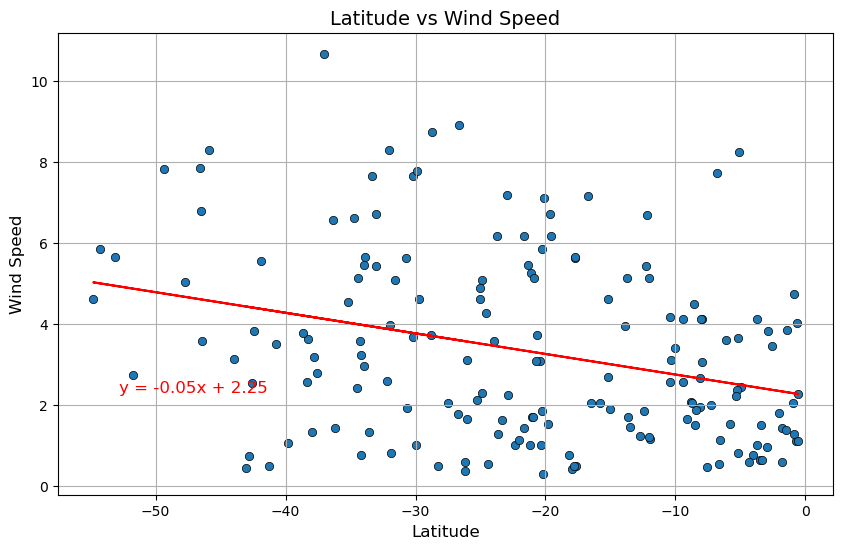

In [28]:
# Southern Hemisphere
plot_linear_regression(
    x=southern_hemi_df["Lat"],
    y=southern_hemi_df["Wind Speed"],
    xlabel="Latitude",
    ylabel="Wind Speed",
    title="Latitude vs Wind Speed",
    filename="output_data/SH_Lat_vs_WindSpeed.png"
)

**Discussion about the linear relationship:**
For the northern hemisphere, the line is flat which shows that there is no relationship between wind speed and latitude.
As for the southern hemipshere, there is a negative slope which indicates that wind speed decreases as latitude increases but the relationship is fairly weak.